### Importing libraries

In [154]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import pickle
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Importing dataset

In [155]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/data/spam.csv')

In [156]:
df.sample(5)

,Category,Message
2556,spam,FreeMSG You have been awarded a FREE mini DIGI...
2370,ham,A Boy loved a gal. He propsd bt she didnt mind...
2850,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
5522,ham,Thats cool. I want to please you...
5398,ham,Hi. Hope you had a good day. Have a better night.


In [157]:
df.shape

(5572, 2)

In [158]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Nettoyage des données

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [160]:
df.sample(5)

,Category,Message
8,spam,WINNER!! As a valued network customer you have...
4385,ham,Thanks honey but still haven't heard anything ...
4000,ham,K...k...when will you give treat?
2481,spam,Urgent! call 09066612661 from landline. Your c...
2778,ham,Kind of. Took it to garage. Centre part of exh...


Renommage des Colonnes : Les noms des colonnes sont ensuite renommés pour des noms plus significatifs (Category en target et Message en texte).

In [161]:
# renaming the cols
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
3390,ham,O. Guess they both got screwd
1126,spam,For taking part in our mobile survey yesterday...
2462,ham,Anything lar...
4220,ham,Anything lor if they all go then i go lor...
5527,ham,"Total disappointment, when I texted you was th..."


Encodage des Étiquettes : La variable cible (ham et spam) est encodée à l'aide de LabelEncoder.

In [162]:
encoder = LabelEncoder()

In [163]:
df['target'] = encoder.fit_transform(df['target'])

In [164]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Gestion des Valeurs Manquantes et des Doublons : Le notebook vérifie les valeurs manquantes et les doublons dans le jeu de données, supprime les doublons et confirme la forme du jeu de données.

In [165]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [166]:
# check for duplicate values
df.duplicated().sum()

415

In [167]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [168]:
df.duplicated().sum()

0

In [169]:
df.shape

(5157, 2)

## 2. Analyse exploratoire des données (EDA)

In [170]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [171]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

Visualisation de la Distribution des Classes : L'EDA comprend des visualisations pour comprendre la distribution des classes dans la variable cible.

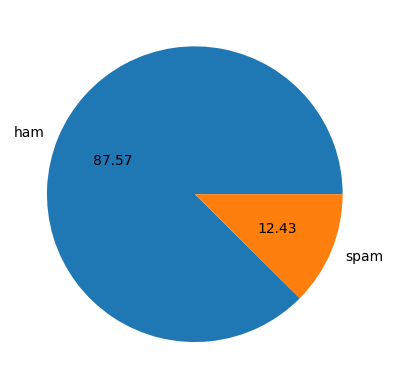

In [172]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

**Data is imbalanced**

Analyse des Caractères, Mots et Phrases : Le notebook calcule et analyse le nombre de caractères, de mots et de phrases dans chaque message texte.

In [173]:
df['num_characters'] = df['text'].apply(len)

In [174]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [175]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [176]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [177]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

Résumé Statistique et Visualisation : Des statistiques descriptives et des visualisations sont utilisées pour comprendre la distribution des caractères, des mots et des phrases dans les messages ham et spam.

In [178]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [179]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [180]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [181]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

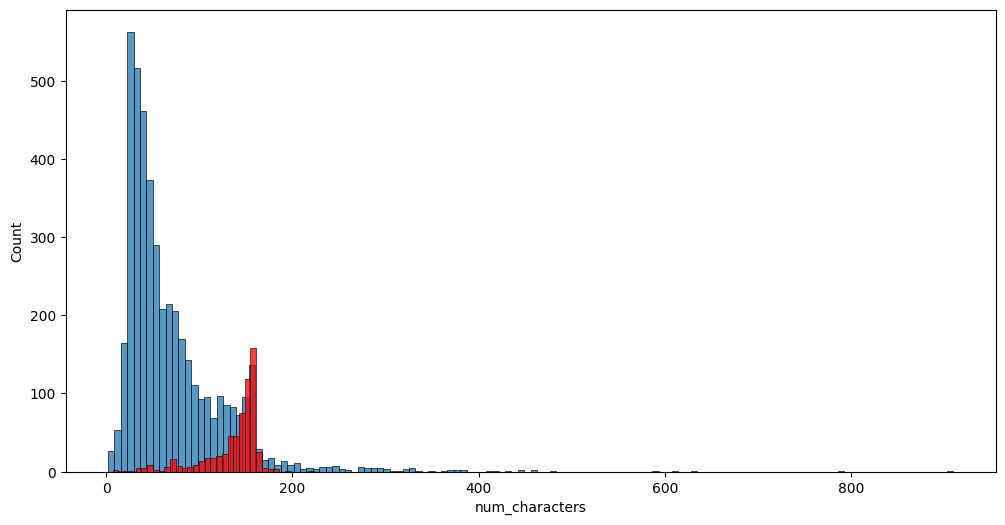

In [182]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

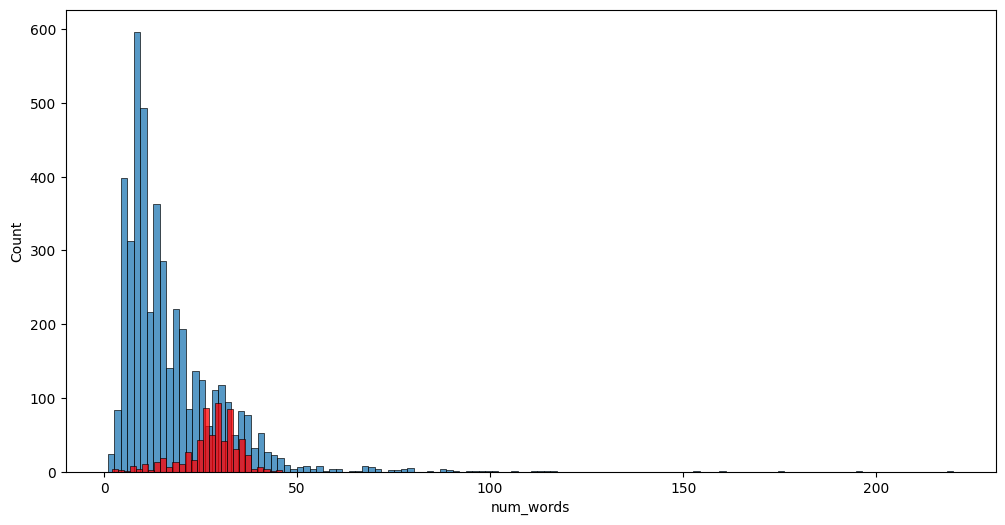

In [183]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

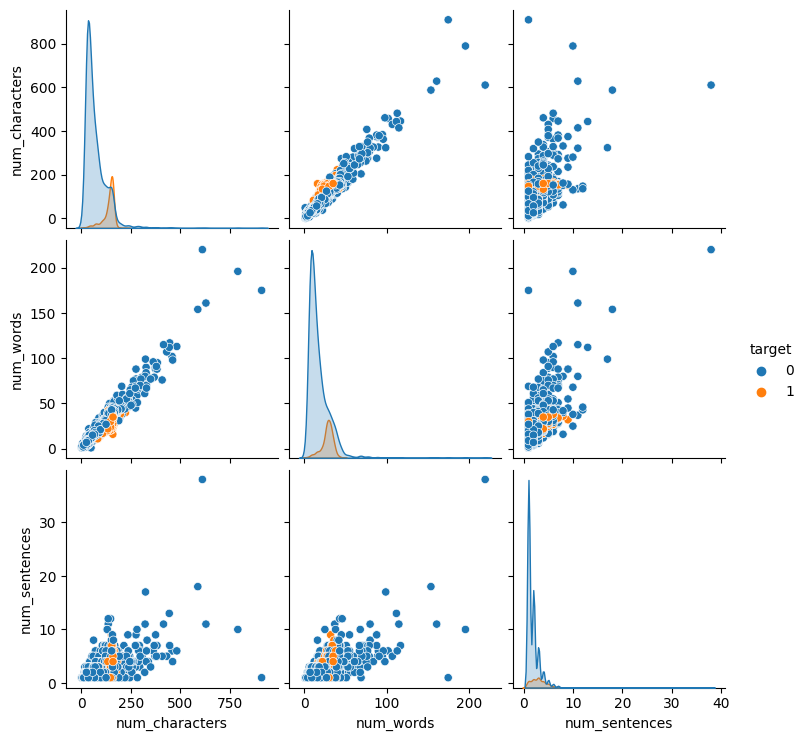

In [184]:
sns.pairplot(df,hue='target')

<ipython-input-185-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

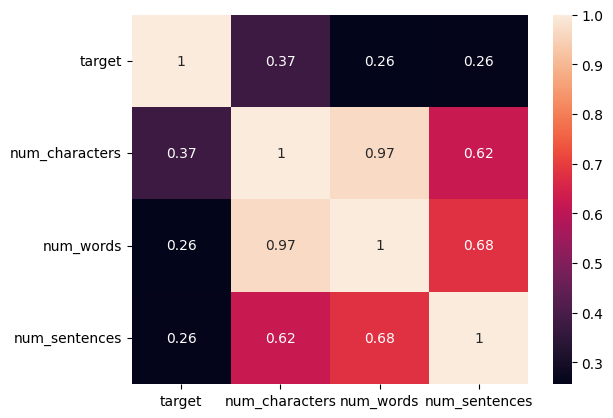

In [185]:
sns.heatmap(df.corr(),annot=True)

## 3. Prétraitement du Texte
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

**Fonction de Transformation du Texte :** Une fonction est définie pour la transformation du texte, comprenant la conversion en minuscules, la tokenisation, la suppression des caractères spéciaux, des mots vides et le racornissement.

In [186]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [187]:
transform_text("I'm going be home soon and i don't want to talk about this stuff anymore tonight, ok? I've cried enough today.")

'go home soon want talk stuff anymor tonight ok cri enough today'

In [188]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [189]:
df['transformed_text'] = df['text'].apply(transform_text)

In [190]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Nuages de Mots et Visualisation : Des nuages de mots sont créés pour les messages ham et spam afin de visualiser les mots les plus fréquents.

In [191]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [192]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

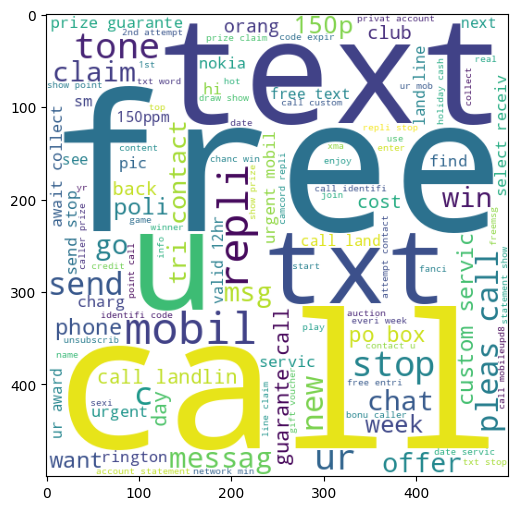

In [193]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [194]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

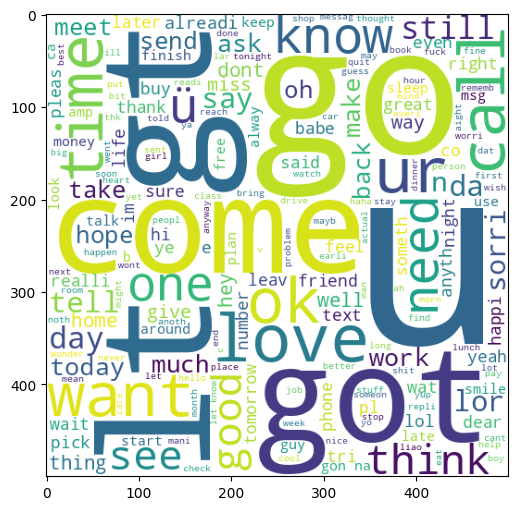

In [195]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [196]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [197]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [198]:
len(spam_corpus)

9781

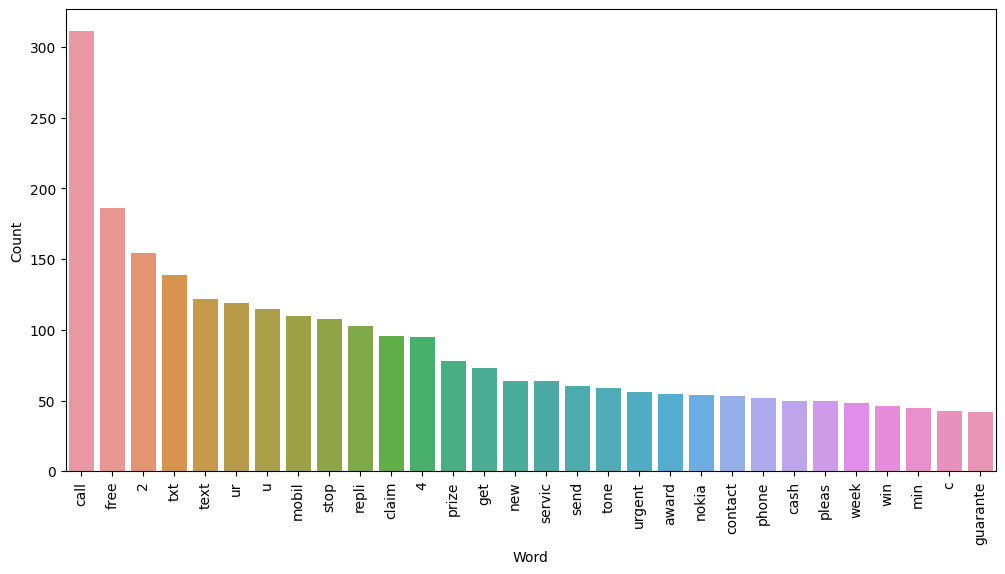

In [199]:
# Count the occurrences of each word in spam_corpus
word_counts = Counter(spam_corpus)

# Create a DataFrame from the Counter
word_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the bar chart using sns.barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.show()

In [200]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [201]:
len(ham_corpus)

35940

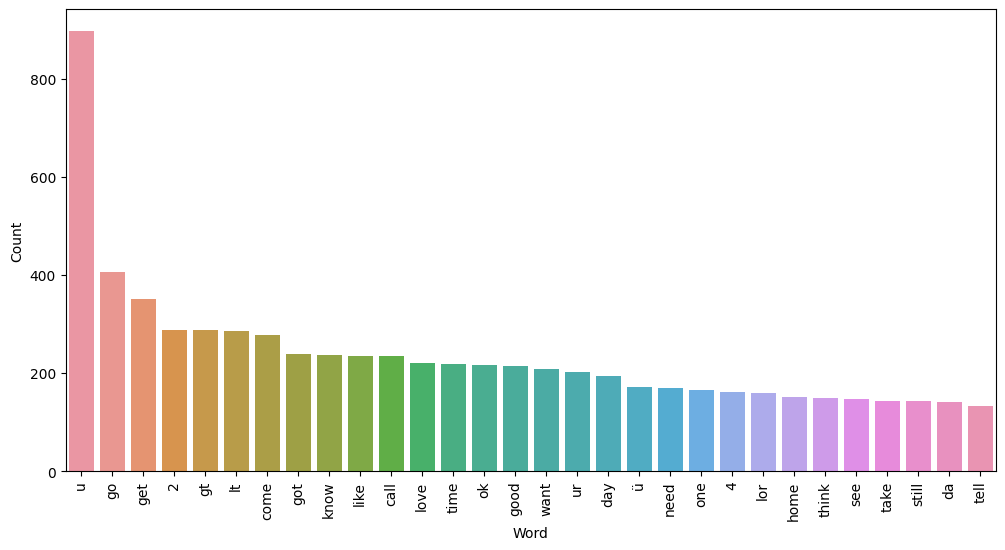

In [202]:
# Count the occurrences of each word in ham_corpus
word_counts = Counter(ham_corpus)

# Create a DataFrame from the Counter
word_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the bar chart using sns.barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.show()

In [203]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Construction du Modèle

Vectorisation du Texte : La méthode Bag of Words (à l'aide de TF-IDF) est utilisée pour la vectorisation du texte.

In [204]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [205]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [206]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [207]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [208]:
X.shape

(5157, 3000)

In [209]:
y = df['target'].values

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Sélection du Modèle : Divers algorithmes de classification sont entraînés et évalués, notamment le Naive Bayes Gaussien, le Naive Bayes Multinomial et le Naive Bayes Bernoulli.

In [211]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Entraînement et évaluation de différents modèles Naive Bayes

In [212]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

Comparaison des Modèles : La précision, la matrice de confusion et le score de précision de chaque modèle sont affichés et analysés.

In [213]:
print("Metrics for Gaussian Naive Bayes:")
print("Accuracy - ", accuracy_score(y_test, y_pred1))
print("Confusion Matrix - ", confusion_matrix(y_test, y_pred1))
print("Precision - ", precision_score(y_test, y_pred1))

print("Metrics for Multinomial Naive Bayes:")
print("Accuracy - ", accuracy_score(y_test, y_pred2))
print("Confusion Matrix - ", confusion_matrix(y_test, y_pred2))
print("Precision - ", precision_score(y_test, y_pred2))

print("Metrics for Bernoulli Naive Bayes:")
print("Accuracy - ", accuracy_score(y_test, y_pred3))
print("Confusion Matrix - ", confusion_matrix(y_test, y_pred3))
print("Precision - ", precision_score(y_test, y_pred3))

Metrics for Gaussian Naive Bayes:
Accuracy -  0.8672480620155039
Confusion Matrix -  [[785 120]
 [ 17 110]]
Precision -  0.4782608695652174
Metrics for Multinomial Naive Bayes:
Accuracy -  0.9709302325581395
Confusion Matrix -  [[905   0]
 [ 30  97]]
Precision -  1.0
Metrics for Bernoulli Naive Bayes:
Accuracy -  0.9835271317829457
Confusion Matrix -  [[903   2]
 [ 15 112]]
Precision -  0.9824561403508771


Modèles d'Ensemble : Des modèles d'ensemble tels que le Classificateur de Support Vector, les plus proches voisins, la régression logistique, la forêt aléatoire, etc., sont entraînés et comparés en termes d'exactitude et de précision.

In [214]:
# tfidf --> MNB

In [215]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [216]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [217]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [218]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

## 5. Évaluation

Évaluation des Performances : Le notebook évalue les performances des modèles individuels et compare leurs scores d'exactitude et de précision.

In [219]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9714285714285714


In [220]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [221]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,xgb,0.972868,0.971429
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892


In [222]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [223]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.972868
3,ETC,Accuracy,0.977713
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,xgb,Accuracy,0.972868
7,AdaBoost,Accuracy,0.966085
8,LR,Accuracy,0.958333
9,BgC,Accuracy,0.961240


Visualisation des Performances du Modèle : Les performances de différents modèles sont visualisées à l'aide de diagrammes en barres.

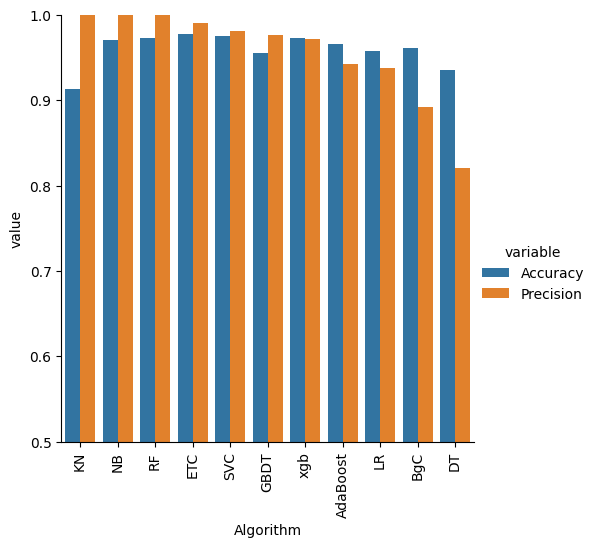

In [224]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 6. Amélioration

Réglage des Paramètres : Le notebook explore des moyens d'améliorer le modèle en modifiant des paramètres tels que le paramètre max_features dans TF-IDF et la mise à l'échelle des caractéristiques.

In [225]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [226]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [227]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [228]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [229]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [230]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [231]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
3,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,xgb,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429,0.972868,0.971429
7,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
8,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
9,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892


Classificateur par Vote : Un classificateur par vote (vote mou) est mis en œuvre en utilisant le Classificateur de Support Vector, le Naive Bayes Multinomial et le Classificateur d'arbres supplémentaires.

In [232]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [233]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [234]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [235]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


**Classificateur Empilé :** Un classificateur empilé est appliqué, combinant le Classificateur de Support Vector, le Naive Bayes Multinomial et le Classificateur d'arbres supplémentaires avec un dernier Classificateur d'arbres aléatoires.

In [236]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [237]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [238]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 0.9655172413793104


## 7. Déploiement

Persistance du Modèle : Le vectoriseur final TF-IDF (vectorizer.pkl) et le modèle Naive Bayes Multinomial (model.pkl) sont sauvegardés à l'aide de pickle pour un déploiement ultérieur.

In [239]:
pickle.dump(tfidf,open('/content/drive/MyDrive/Colab Notebooks/DM/models/vectorizer.pkl','wb'))
pickle.dump(mnb,open('/content/drive/MyDrive/Colab Notebooks/DM/models/model.pkl','wb'))

## Conclusion

En conclusion, ce projet démontre une approche complète pour la détection de spam à travers l'analyse de texte et la construction de modèles. Les étapes clés ont inclus le nettoyage des données, l'analyse exploratoire, le prétraitement du texte, la vectorisation, la construction du modèle, l'évaluation des performances et des suggestions d'améliorations.

Les données ont été soigneusement nettoyées, et l'analyse exploratoire a mis en lumière des caractéristiques importantes. Le prétraitement du texte a permis d'optimiser la représentation des messages, et la construction du modèle a impliqué diverses approches, des modèles Naive Bayes aux modèles d'ensemble.

Les performances des modèles ont été évaluées, révélant des résultats prometteurs avec des modèles atteignant des précisions élevées. Cependant, des améliorations potentielles ont été identifiées, comme le réglage des paramètres et l'exploration de techniques de classification avancées.

En résumé, ce projet fournit une base solide pour la détection de spam, mais il reste des opportunités pour affiner le modèle. L'application de suggestions d'amélioration pourrait renforcer davantage la performance et la robustesse du système.
